# Extract labels from texts

In [1]:
api_key = "MY_API_KEY_PLACEHOLDER"

In [70]:
from openai import OpenAI
import json
from tqdm import tqdm_notebook as tqdm


In [75]:
client = OpenAI(
    api_key=api_key,
)

In [74]:
gpt_3 = "gpt-3.5-turbo-1106"
gpt_4 = "gpt-4-1106-preview"
def get_chat_gpt_response(prompt: str, client: OpenAI, model=gpt_4, temperature=1.0):
    messages = [
        {"role": "user", "content": prompt}
    ]
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        temperature=temperature,
    )
    return chat_completion.choices[0].message.content

In [76]:
prompt_template = """Utilizing the core principles vital for analysis and classification by the methods of natural language processing and machine learning—specifically subject relevance, content precision, meaningful contribution, distinctive feature selection, data diversity, symbolic categorization, and matter-specificity—your task is as follows:

Extract all labels from the provided text that encapsulate aspects of multiculturalism.  For each extracted label, provide a concise rationale explaining the relevance of each keyword to the theme of multiculturalism and include a direct quote from the text.

Please generate your response in the following JSON format:
{ "labels": [
   {"label": "FIRST LABEL", "justification": "FIRST LABEL JUSTIFICATION", "quote": "A PART OF GIVEN TEXT"},
   {"label": "SECOND LABEL", "justification": "SECOND LABEL JUSTIFICATION", "quote": "ANOTHER PART OF GIVEN TEXT"},
   ...
]}

Implement all of the above instructions for the analysis of the provided text:
---

"""

def get_labels(text: str):
    response = get_chat_gpt_response(prompt_template + text, client)
    json_output = response.replace("```json\n", "").replace("\n```", "")
    return json_output
    

In [77]:
text = """A liberal democracy's most basic commitment is to the freedom and equality of its individual citizens. This is reflected in constitutional bills of rights, which guarantee basic civil and political rights to all individuals, regardless of their group membership. Indeed, liberal democracy emerged in part as a reaction against the way that feudalism defined individuals' political rights and economic opportunities by their group membership.

How then can liberals accept the demand for group‐differentiated rights by ethnic and national minorities? Why should the members of certain groups have rights regarding land, language, representation, etc. that the members of other groups do not have? To many people, the idea of group‐differentiated rights seems to rest on a philosophy or world‐view opposite to that of liberalism. It seems more concerned with the status of groups than with that of individuals. Moreover, it seems to treat individuals as the mere carriers of group identities and objectives, rather than as autonomous personalities capable of defining their own identity and goals in life. Group‐differentiated rights, in short, seem to reflect a collectivist or communitarian outlook, rather than the liberal belief in individual freedom and equality.
"""

json_output = get_labels(text)


In [78]:
print(json.dumps(json.loads(json_output), indent=2))

{
  "labels": [
    {
      "label": "group-differentiated rights",
      "justification": "Group-differentiated rights are directly associated with the concept of multiculturalism as they pertain to the rights of specific ethnic and national minorities, which is a fundamental aspect of a multicultural society's legal and social considerations.",
      "quote": "How then can liberals accept the demand for group\u2010differentiated rights by ethnic and national minorities?"
    },
    {
      "label": "ethnic and national minorities",
      "justification": "The notion of 'ethnic and national minorities' is indicative of a multicultural demographic, where having multiple cultural, ethnic, and national identities within a democracy is an area of focus in the discussion of rights and representation.",
      "quote": "How then can liberals accept the demand for group\u2010differentiated rights by ethnic and national minorities?"
    },
    {
      "label": "liberal democracy's commitment t

In [75]:
#from typing import List

#input_file = "2.txt"
#directory = "/Users/nasrin/Desktop/Multiculturalism_sylabes&research/Resourses/B2 Kymlicka, W. (1995). Multicultural Citizenship A Liberal Theory of Minority Rights/" 


In [82]:
#from typing import List

#input_file = "The Politics of Recognition.txt"
#directory = "/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DESKTOP OF OLD MACBOOK AIR/Multiculturalism_sylabes&research/Resourses/"

In [193]:
from typing import List

input_file = "1_THE_CONSTITUTION_ACTS_1867_to_1982.txt"
directory = "/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DESKTOP OF OLD MACBOOK AIR/Multiculturalism_sylabes&research/Resourses/Canada_Legislation/"


In [194]:
def read_paragraph(lines: List[str], start: int):
    if start >= len(lines):
        return '', -1
    for idx, line in enumerate(lines[start:]):
        if len(line.strip()) == 0:
            return '\n'.join(lines[start:start+idx]), start + idx + 1
    return '\n'.join(lines[start:start+idx]), -1

def process_file(file_path: str):
    
    with open(file_path, 'rt') as f:
        lines = f.readlines()

    start = 0
    last_start = 0
    pbar = tqdm(total=len(lines))
    err = 0
    
    outputs = []
    while start != -1 and start < len(lines):
        pbar.update(start - last_start)

        last_start = start
        paragraph, start = read_paragraph(lines, start)
        paragraph = paragraph.strip()    
        if len(paragraph) > 10:
            json_output = get_labels(paragraph)
            try:
                labels = json.loads(json_output)
                labels['paragraph'] = paragraph
            except:
                err += 1
                labels = {'response': json_output}
            
            json_line = json.dumps(labels)
            outputs.append(json_line)
    
    return outputs
            

outputs = process_file(directory + input_file)


/var/folders/3b/m5fxvrrd5gg0gg3tx5h51f680000gn/T/ipykernel_1097/2380489230.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar = tqdm(total=len(lines))


  0%|          | 0/2713 [00:00<?, ?it/s]

In [197]:
with open(directory + f"chat_gpt/{input_file}", "wt") as fout:
    fout.writelines(outputs)

In [198]:
print(directory + f"chat_gpt/{input_file}")

/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DESKTOP OF OLD MACBOOK AIR/Multiculturalism_sylabes&research/Resourses/Canada_Legislation/chat_gpt/1_THE_CONSTITUTION_ACTS_1867_to_1982.txt


In [ ]:
# Use this command to view outputs:
# jq -C . The\ Politics\ of\ Recognition.txt | less -R

# Conver to embedding

In [94]:
import os
from typing import List
import json
import random
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [95]:
# First create label files with this command:
# jq . 1_THE_CONSTITUTION_ACTS_1867_to_1982.txt | grep '"label":' | sort | uniq > 1_THE_CONSTITUTION_ACTS_1867_to_1982.txt
# Mahdi:
# this will be dine in Terminal. i just could do it by full adress in the begging and the end, like:
# jq . /Users/mahdi/Downloads/Constitution_part1.txt | grep '"label":' | sort | uniq > /Users/mahdi/Downloads/Constitution_part1-label.txt
# the below adress didn't work:
# jq . /Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DESKTOP OF OLD MACBOOK AIR/Multiculturalism_sylabes&research/Resourses/Canada_Legislation/Constitution_part1.txt | grep '"label":' | sort | uniq > /Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DESKTOP OF OLD MACBOOK AIR/Multiculturalism_sylabes&research/Resourses/Canada_Legislation/Constitution_part1-label.txt




concept_files = [
    "1_THE_CONSTITUTION_ACTS_1867_to_1982_part1-label.txt",
    "1_THE_CONSTITUTION_ACTS_1867_to_1982_part2-label.txt"
]

concept_directory = "/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/"

def read_concepts(concept_file):
    assert os.path.exists(concept_file)

    with open(concept_file, 'rt') as input_file:
        concepts = input_file.readlines()
        concepts = map(lambda concept: concept.replace('"label": ', ''), concepts)
        concepts = map(lambda concept: concept.replace('"', ''), concepts)
        concepts = map(lambda concept: concept.strip(), concepts)
        concepts = map(lambda concept: concept[:-1], concepts)   # remove comma at the end
    concepts = list(concepts)
    return concepts

def save_results(res_file, res):
    with open(res_file, "wb") as pickle_file:
        pickle.dump(res, pickle_file)
    print(f"Results is saved at\n{res_file}")

In [96]:
api_key = "MY_API_KEY_PLACEHOLDER"

from openai import OpenAI
import json
from tqdm import tqdm_notebook as tqdm

client = OpenAI(
    api_key=api_key,
)

In [97]:
for file_name in concept_files:
    concept_file = concept_directory + file_name
    concepts = read_concepts(concept_file)
    print(concepts[:10])
    print(len(concepts))
    res = client.embeddings.create(input=concepts, model="text-embedding-ada-002")
    res_file = concept_directory + file_name + ".pkl"
    save_results(res_file, res)

['Altered under the Authority of this Act', 'Assets', 'Being a Householder', 'Bilingualism', 'British Empire', 'British North America', 'British Subject', 'Canada Act 1982', 'Case of Quebec', 'Census of the Population of Canada']
218
Results is saved at
/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/1_THE_CONSTITUTION_ACTS_1867_to_1982_part1-label.txt.pkl
['1982', '1983', '1999', '20-21 Geo. V', '22 Geo. V, c. 4', '5-6 Geo. V, c. 45 (U.K.)', 'Aboriginal Peoples of Canada', 'Aboriginal rights', 'Act', 'Adjacent Territories Order']
394
Results is saved at
/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/1_THE_CONSTITUTION_ACTS_1867_to_1982_part2-label.txt.pkl


# Visualizing Entire Labels Together

In [29]:
# i add these codes after Majid. should be deleted.
import os
from typing import List  # Add this line
import json
import random
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Rest of your code...
# added until here. should be deleted


def read_res(file_path):
    with open(file_path, 'rb') as fin:
        res = pickle.load(fin)
        print(f"Read {len(res.data)} from {file_path}")
        return res
    
def get_embeddings(results: List):
    concept_embeddings = []
    ends = []
    for res in results:
        concept_embeddings += [d.embedding for d in res.data]
        ends.append(len(concept_embeddings))

    return concept_embeddings, ends

def to_2D(concept_embeddings):
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(np.asarray(concept_embeddings))
    return embeddings_2d

def visualize(embeddings_2d, ends, colors, labels, concepts):
    plt.figure(figsize=(40, 20))
    start = 0
    for end, color, label in zip(ends, colors, labels):
        plt.scatter(embeddings_2d[start:end, 0], embeddings_2d[start:end, 1], color=color, label=label)
        start = end
    
    text_colors = []
    start = 0
    for end, color in zip(ends, colors):
        text_colors += [color for i in range(start, end)]
        start = end
        
    for i, label in enumerate(concepts):
        # This is where we select the probablity of words to be shown
        if random.random() < 0.2:            
            plt.annotate(
                label, 
                (embeddings_2d[i, 0], embeddings_2d[i, 1]), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center', 
                color=text_colors[i]
            )
        
    plt.title('2D Visualization of Embeddings')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()

    plt.show()


In [30]:
embedding_files = [
    "The Politics of Recognition-labels.txt.pkl",
    "2-labels.txt.pkl",
    "1_THE_CONSTITUTION_ACTS_1867_to_1982-label.txt.pkl"
]

colors = [
    'blue',
    'red',
    'green'
]

embedding_dir = "/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DESKTOP OF OLD MACBOOK AIR/Multiculturalism_sylabes&research/Resourses/chat_gpt/"

/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DESKTOP OF OLD MACBOOK AIR/Multiculturalism_sylabes&research/Resourses/chat_gpt/The Politics of Recognition-labels.txt.pkl
Read 265 from /Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DESKTOP OF OLD MACBOOK AIR/Multiculturalism_sylabes&research/Resourses/chat_gpt/The Politics of Recognition-labels.txt.pkl
/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DESKTOP OF OLD MACBOOK AIR/Multiculturalism_sylabes&research/Resourses/chat_gpt/2-labels.txt.pkl
Read 428 from /Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DESKTOP OF OLD MACBOOK AIR/Multiculturalism_sylabes&research/Resourses/chat_gpt/2-labels.txt.pkl
/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DESKTOP OF OLD MACBOOK AIR/Multiculturalism_sylabes&research/Resourses/chat_gpt/1_THE_CONSTITUTION_ACTS_1867_to_1982-label.txt.pkl
Read 585 from /Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DESKTOP O

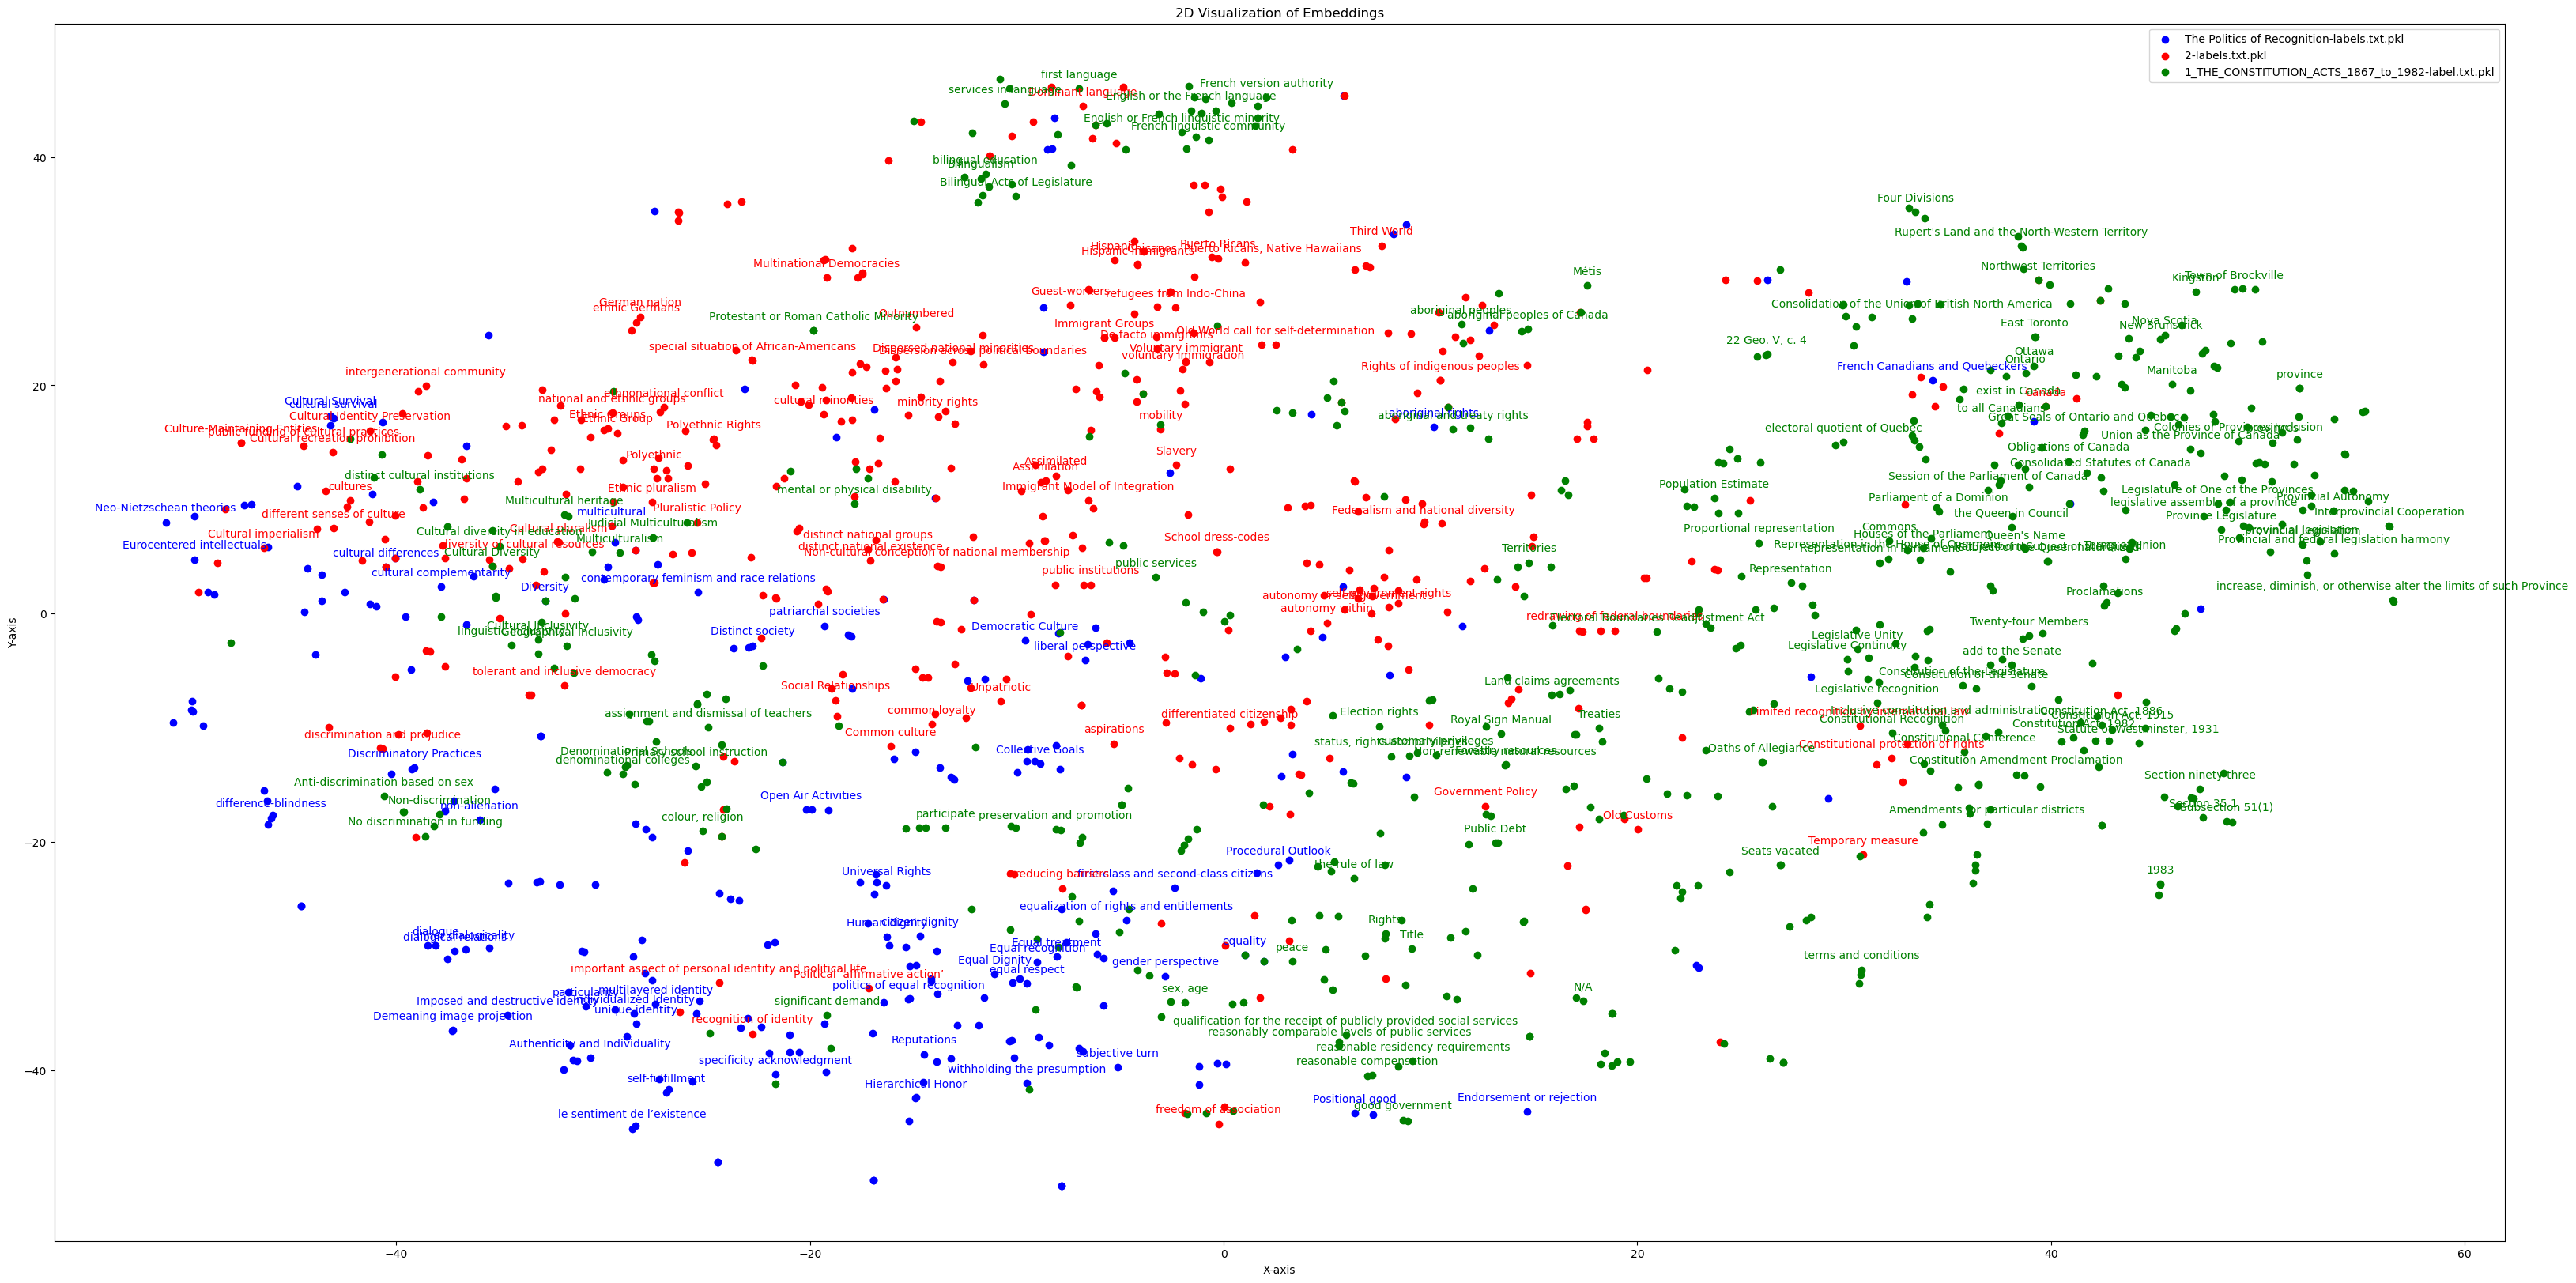

In [31]:
results = []
concepts = []
for file in embedding_files:
    res_file = embedding_dir + file
    print(res_file)
    embedding_res = read_res(res_file)
    concepts += read_concepts(res_file.replace('.pkl', ''))
    results.append(embedding_res)

vectors, ends = get_embeddings(results)
print(ends)
points = to_2D(vectors)
visualize(points, ends, colors, embedding_files, concepts)